In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),target_transform=None,download=True)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


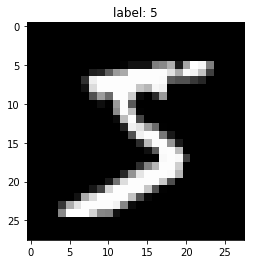

In [4]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

#데이터 하나 형태
image, label=mnist_train.__getitem__(0)
print "image data 형태:", image.size()
print "label:",label

#그리기
img =image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [5]:
#hyper parameters
batch_size=1024
learning_rate=0.01
num_epoch=400

In [8]:
train_loader=torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)
test_loader=torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)

[0]
한 번에 로드되는 데이터의 크기: 1024


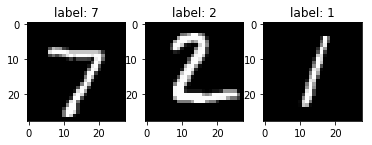

[1]
한 번에 로드되는 데이터의 크기: 1024


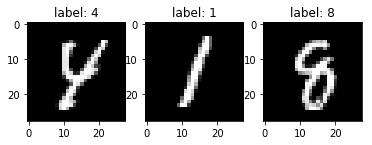

[2]
한 번에 로드되는 데이터의 크기: 1024


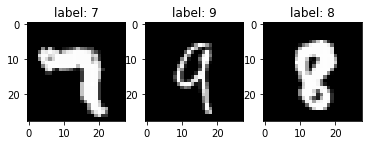

[3]
한 번에 로드되는 데이터의 크기: 1024


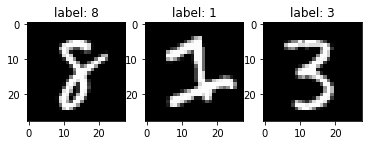

[4]
한 번에 로드되는 데이터의 크기: 1024


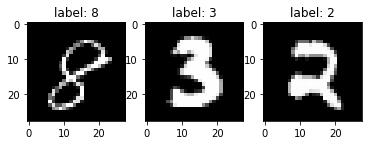

[5]
한 번에 로드되는 데이터의 크기: 1024


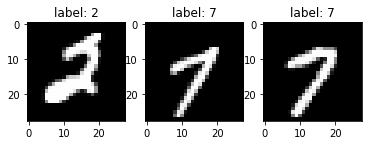

In [10]:
n=3 #샘플로 그려볼 데이터 개수
for i,[imgs,labels]in enumerate(test_loader):
    if i>5:
        break
    print "[%d]" %i
    print "한 번에 로드되는 데이터의 크기:", len(imgs)
    
    #그리기
    for j in range(n):
        img=imgs[j].numpy()
        img=img.reshape((img.shape[1],img.shape[2]))
        
        plt.subplot(1,n,j+1)
        plt.imshow(img,cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show()

In [11]:
#모델 선언
# *퍼셉트론(2 hidden layer) *
model=nn.Sequential(nn.Linear(28*28,256),nn.Sigmoid(),nn.Linear(256,128),nn.Linear(128,10),)
#파라미터 보기
#print(list(model.parameters())) #초기 파라미터 출력

[Parameter containing:
tensor([[ 0.0081, -0.0188, -0.0052,  ..., -0.0193, -0.0179,  0.0064],
        [ 0.0204, -0.0336, -0.0176,  ..., -0.0098,  0.0115, -0.0231],
        [-0.0079, -0.0180, -0.0330,  ...,  0.0309, -0.0053,  0.0252],
        ...,
        [-0.0248,  0.0313,  0.0345,  ...,  0.0124, -0.0064, -0.0053],
        [ 0.0049, -0.0288,  0.0129,  ...,  0.0210, -0.0043,  0.0089],
        [ 0.0218,  0.0056, -0.0179,  ..., -0.0303, -0.0154, -0.0355]],
       requires_grad=True), Parameter containing:
tensor([-0.0015, -0.0318, -0.0267, -0.0260,  0.0189,  0.0276, -0.0155, -0.0022,
        -0.0129,  0.0113, -0.0301,  0.0334,  0.0200,  0.0277, -0.0322,  0.0145,
        -0.0208,  0.0090,  0.0312,  0.0221,  0.0302,  0.0009,  0.0258,  0.0212,
         0.0239,  0.0010,  0.0211,  0.0275, -0.0135,  0.0110,  0.0238, -0.0340,
         0.0249,  0.0089,  0.0111, -0.0090,  0.0232,  0.0262, -0.0049,  0.0223,
         0.0319,  0.0164, -0.0246,  0.0030, -0.0335, -0.0123,  0.0357, -0.0347,
         0.01

In [13]:
#model = model.cuda()

In [19]:
def ComputeAccr(dloader,imodel):
    correct=0
    total=0
    for j,[imgs,labels] in enumerate(dloader):
        img=imgs
        label=Variable(labels)
        #label=Variable(labels).cuda()
        #(batch_size,1,28,28)->(batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[2],img.shape[3]))
        #(batch_size,28,28)->(batch_size,28*28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
        img=Variable(img,requires_grad=False)
        #img=Variable(img,requires_grad=False).cuda()
        output=imodel(img) #forward prop.
        _,output_index=torch.max(output,1)
        total+= label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [20]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 13.0425348282


In [22]:
loss_func=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [24]:
for i in range(num_epoch):
    for j,[imgs,labels] in enumerate(train_loader):
        img=imgs
        label=Variable(labels)
        #label=Variable(labels).cuda()
        #(batch_size,1,28,28)->(batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[2],img.shape[3]))
        #(batch_size,28,28)->(batch_size,28*28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
        img=Variable(img,requires_grad=True)
        optimizer.zero_grad()
        output=model(img)
        loss=loss_func(output,label)
        loss.backward()#back prop.
        optimizer.step() #weight 조정
    if i%50==0:
        print("%d.."%i)
        netname='/nets/mlp_weight.pkl'
        torch.save(model,netname, )
        ComputeAccr(test_loader,model)
        print loss

0..
Accuracy of Test Data: 11.3064231873
tensor(2.2896, grad_fn=<NllLossBackward>)
50..
Accuracy of Test Data: 80.284286499
tensor(0.7474, grad_fn=<NllLossBackward>)
100..
Accuracy of Test Data: 88.0859375
tensor(0.4070, grad_fn=<NllLossBackward>)
150..
Accuracy of Test Data: 90.028213501
tensor(0.3785, grad_fn=<NllLossBackward>)
200..
Accuracy of Test Data: 90.744354248
tensor(0.3342, grad_fn=<NllLossBackward>)
250..
Accuracy of Test Data: 91.384552002
tensor(0.3894, grad_fn=<NllLossBackward>)
300..
Accuracy of Test Data: 91.6015625
tensor(0.2907, grad_fn=<NllLossBackward>)


KeyboardInterrupt: 

In [ ]:
ComputeAccr(test_loader,model)